In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Mounting in Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read Files in Drive
df_train = pd.read_csv('/content/drive/MyDrive/FGA-Binar Academy/Exercise Studi Kasus Titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/FGA-Binar Academy/Exercise Studi Kasus Titanic/test.csv')

# Exploratory Data Analysis

In [5]:
# Import Library
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df_train.shape

(891, 12)

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## How many do passengers survived and died?

In [13]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

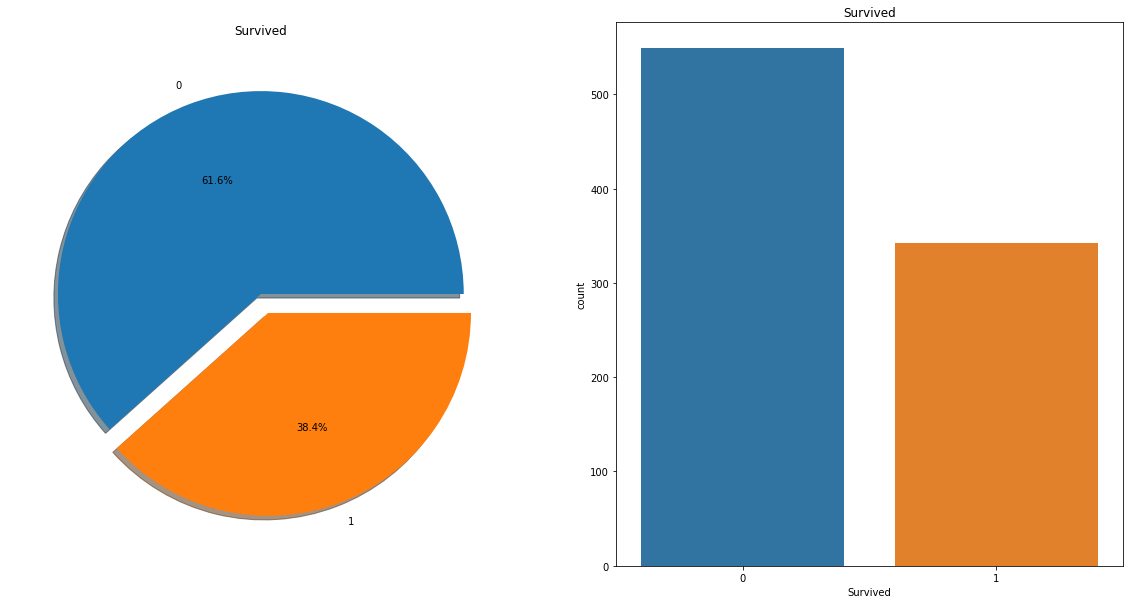

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## How many do passengers survived and died based on Sex?

In [15]:
df_train.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

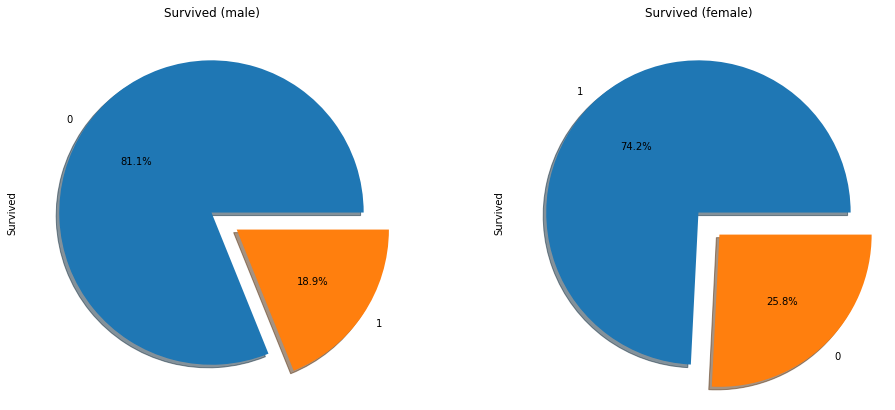

In [16]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
plt.show()

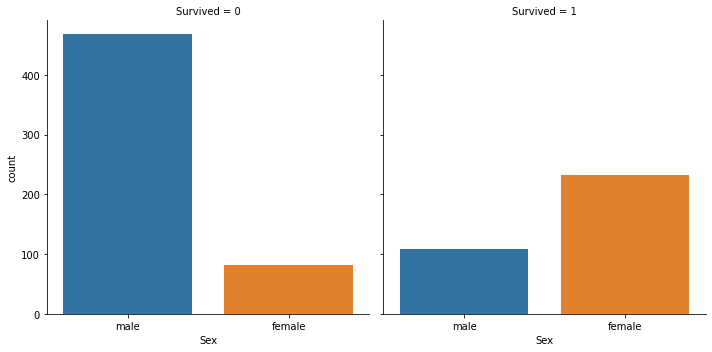

In [17]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train);

## How many do passengers survived and died based on Pclass?

In [18]:
df_train.groupby(['Survived', 'Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

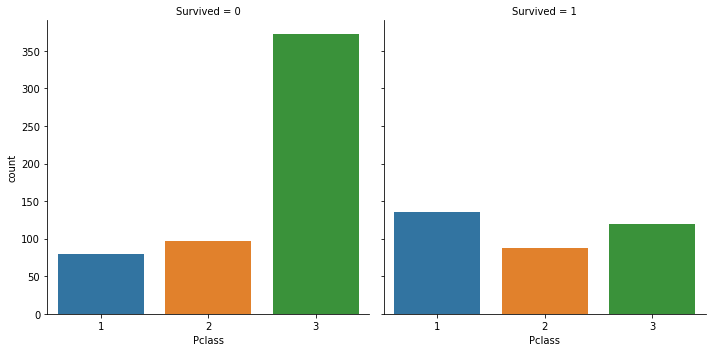

In [19]:
sns.catplot(x='Pclass', col='Survived', kind='count', data=df_train);

## How is the Age distribution of passengers?

Text(0.5, 0, 'Usia')

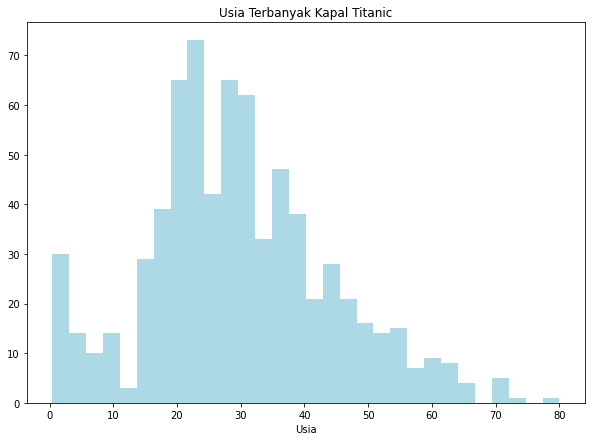

In [20]:
plt.figure(figsize = (10, 7))
x = df_train["Age"]
plt.hist(x, bins = 30, color = "lightblue")
plt.title("Usia Terbanyak Kapal Titanic")
plt.xlabel("Usia")

# Preprocessing Data

## Data Cleaning

### Missing Value

In [21]:
df_train.isna().values.any()

True

In [22]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#Handling missing value pada fitur numerical
df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)

#Handling missing value pada fitur categorical
df_train['Cabin'].fillna((df_train['Cabin'].mode()[0]), inplace = True)
df_train['Embarked'].fillna((df_train['Embarked'].mode()[0]), inplace = True)

In [24]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Duplicated Data

In [25]:
df_train.duplicated().sum()

0

## Normalization

In [26]:
# Import Library
from sklearn.preprocessing import MinMaxScaler

In [27]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df_train['Age'] = MinMaxScaler().fit_transform(df_train['Age'].values.reshape(len(df_train), 1))
df_train['SibSp'] = MinMaxScaler().fit_transform(df_train['SibSp'].values.reshape(len(df_train), 1))
df_train['Parch'] = MinMaxScaler().fit_transform(df_train['Parch'].values.reshape(len(df_train), 1))
df_train['Fare'] = MinMaxScaler().fit_transform(df_train['Fare'].values.reshape(len(df_train), 1))

In [29]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.367921,0.065376,0.063599,0.062858
std,257.353842,0.486592,0.836071,0.163383,0.137843,0.134343,0.096995
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.271174,0.000000,0.000000,0.015440
50%,446.000000,0.000000,3.000000,0.367921,0.000000,0.000000,0.028213
75%,668.500000,1.000000,3.000000,0.434531,0.125000,0.000000,0.060508
max,891.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Detect Outliers

In [30]:
numerical = ['Age', 'SibSp', 'Parch', 'Fare'] 

# Using IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))

for col in numerical:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 891
Jumlah baris setelah memfilter outlier: 577


## Feature Encoding

In [31]:
for col in ['Sex', 'Embarked']:
    df_train[col] = df_train[col].astype('category')
  
df_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp           float64
Parch           float64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [32]:
for col in ['Sex', 'Embarked']:
    df_train[col] = df_train[col].cat.codes
  
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,0.125,0.0,A/5 21171,0.014151,B96 B98,2
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0.000,0.0,STON/O2. 3101282,0.015469,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,0.125,0.0,113803,0.103644,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0.000,0.0,373450,0.015713,B96 B98,2
5,6,0,3,"Moran, Mr. James",1,0.367921,0.000,0.0,330877,0.016510,B96 B98,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",1,0.308872,0.000,0.0,SOTON/OQ 392076,0.013761,B96 B98,2
886,887,0,2,"Montvila, Rev. Juozas",1,0.334004,0.000,0.0,211536,0.025374,B96 B98,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0.233476,0.000,0.0,112053,0.058556,B42,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0.321438,0.000,0.0,111369,0.058556,C148,0


# Independent and Dependent Variable

In [33]:
df_model = df_train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_model.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0.271174,0.125,0.0,0.014151,2
2,3,1,3,0,0.321438,0.000,0.0,0.015469,2
3,4,1,1,0,0.434531,0.125,0.0,0.103644,2
4,5,0,3,1,0.434531,0.000,0.0,0.015713,2
5,6,0,3,1,0.367921,0.000,0.0,0.016510,1


In [34]:
x = df_model.drop(['PassengerId','Survived'], axis=1)

In [35]:
y = df_model['Survived']

# Feature Selection

In [36]:
from  sklearn.feature_selection import SelectKBest, chi2

In [37]:
X_new = SelectKBest(chi2, k=5).fit_transform(x, y)
X_new.shape

(577, 5)

In [38]:
X_new

array([[3.        , 1.        , 0.125     , 0.01415106, 2.        ],
       [3.        , 0.        , 0.        , 0.01546857, 2.        ],
       [1.        , 0.        , 0.125     , 0.1036443 , 2.        ],
       ...,
       [1.        , 0.        , 0.        , 0.0585561 , 2.        ],
       [1.        , 1.        , 0.        , 0.0585561 , 0.        ],
       [3.        , 1.        , 0.        , 0.01512699, 1.        ]])

# Train-test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 123)

# KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
# membuat fungsi evaluasi model
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [45]:
evaluasi_model(knn, X_test, y_test)

0.7528735632183908

# Decision Tree Model

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
evaluasi_model(dtc, X_test, y_test)

0.8103448275862069